# CSE 252B: Computer Vision II, Winter 2023 – Assignment 5
### Instructor: Ben Ochoa
### Due: Wednesday, March 22, 2023, 11:59 PM

## Instructions
* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* This assignment contains both math and programming problems.
* All solutions must be written in this notebook
* Math problems must be done in Markdown/LATEX.
* You must show your work and describe your solution.
* Programming aspects of this assignment must be completed using Python in this notebook.
* Your code should be well written with sufficient comments to understand, but there is no need to write extra markdown to describe your solution if it is not explictly asked for.
* This notebook contains skeleton code, which should not be modified (This is important for standardization to facilate effecient grading).
* You may use python packages for basic linear algebra, but you may not use packages that directly solve the problem. If you are uncertain about using a specific package, then please ask the instructional staff whether or not it is allowable.
* You must submit this notebook exported as a pdf. You must also submit this notebook as an .ipynb file.
* Your code and results should remain inline in the pdf (Do not move your code to an appendix).
* **You must submit 3 files on Gradescope - .pdf , .ipynb and .py file where the .py file is the conversion of your .ipynb to .py file . You must mark each problem on Gradescope in the pdf. You can convert you .ipynb to .py file using the following command:**

<center> jupyter nbconvert --to script filename.ipynb --output output_filename.py </center>

* It is highly recommended that you begin working on this assignment early.

## Problem 1 (Math): Point on Line Closest to the Origin (5 points)
  Given a line $\boldsymbol{l} = (a, b, c)^\top$, show that the point on
  $\boldsymbol{l}$ that is closest to the origin is the point $\boldsymbol{x} =
  (-ac, -bc, a^2+b^2)^\top$ (Hint: this calculation is needed in the
  two-view optimal triangulation method used below).

"""Write your solution here."""

$\begin{gather}
\boldsymbol{l} = \begin{bmatrix} a \\ b \\ c \end{bmatrix}, \boldsymbol{x} = \begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix} \tag*{}\\
\end{gather}$

So,
$\begin{align}
\boldsymbol{T} = \begin{bmatrix} 1 & 0 & a \\ 0 & 1 & b \\ 0 & 0 & 1 \end{bmatrix} \tag*{}
\end{align}$

$\begin{align}
\boldsymbol{x}^{'} &= \boldsymbol{T} \boldsymbol{x} \tag*{}\\
\boldsymbol{x}^{'} &= \begin{bmatrix} a \\ b \\ 1 \end{bmatrix} \tag*{}
\end{align}$

Now,

$\begin{align}
\lambda &= -\frac{\boldsymbol{l}^{\top}\boldsymbol{x}^{'}}{\boldsymbol{l}^{\top}\boldsymbol{x} - \boldsymbol{l}^{\top}\boldsymbol{x}^{'}} \tag*{}\\
\text{Substituting values,} \tag*{}\\
\lambda &= -\frac{a^2 + b^2 + c}{c - (a^2 + b^2 + c)} \tag*{}\\
\lambda &= \frac{a^2 + b^2 + c}{a^2 + b^2} \tag*{}
\end{align}$

Using pencil of points,

$\begin{align}
\boldsymbol{x}(\lambda) &= \lambda\boldsymbol{x} + (1 - \lambda)\boldsymbol{x}^{'} \tag*{}\\
\text{Substituting values,} \tag*{}\\
\boldsymbol{x}(\lambda) &= \frac{a^2 + b^2 + c}{a^2 + b^2} \begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix} - \frac{c}{a^2 + b^2} \begin{bmatrix} a \\ b \\ 1 \end{bmatrix} \tag*{}\\
\boldsymbol{x}(\lambda) &= \begin{bmatrix} -\frac{ca}{a^2 + b^2} \\ -\frac{cb}{a^2 + b^2} \\ 1 \end{bmatrix} \tag*{}
\end{align}$

Hence, closest to origin point in homogenous coordinates is,

$\begin{align}
\boldsymbol{x} = \begin{bmatrix} -\frac{ca}{a^2 + b^2} & -\frac{cb}{a^2 + b^2} & 1 \end{bmatrix}^{\top} \tag*{}
\end{align}$

which matches the given point.

## Problem 2 (Programming): Feature Detection (20 points)
Download input data from the course website. The file IMG_5030.jpeg
contains image 1 and the file IMG_5031.jpeg contains image 2. 

For each input image, calculate an image where each pixel value is the minor
eigenvalue of the gradient matrix

$N=\left[ \begin{array}{cc}
\sum\limits_w I_x^2 & \sum\limits_w I_x I_y\\
\sum\limits_w I_x I_y & \sum\limits_w I_y^2
\end{array} \right]$

where w is the window about the pixel, and $I_x$ and $I_y$ are the gradient images in
the x and y direction, respectively. Calculate the gradient images using the fivepoint
central difference operator. Set resulting values that are below a specified
threshold value to zero (hint: calculating the mean instead of the sum in N allows
for adjusting the size of the window without changing the threshold value). Apply
an operation that suppresses (sets to 0) local (i.e., about a window) nonmaximum
pixel values in the minor eigenvalue image. Vary these parameters such that
1350–1400 features are detected in each image. For resulting nonzero pixel
values, determine the subpixel feature coordinate using the Forstner corner point
operator.

#### Report your final values for:
 * the size of the feature detection window (i.e. the size of the window used to calculate the elements in the gradient matrix N)
 * the minor eigenvalue threshold value 
 * the size of the local nonmaximum suppression window 
 * the resulting number of features detected (i.e. corners) in each image.

#### Display figures for:
 * original images with detected features, where the detected features are indicated by a square window (the size of the detection window) about the features
 
A typical implementation takes around <strong>30</strong> seconds. If yours takes more than <strong>60</strong>, you may lose points.

In [3]:
%matplotlib inline
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.signal import convolve2d as conv2d
import scipy.ndimage
from scipy import signal
from math import *
from tqdm import tqdm


def image_gradient(I):
    # inputs: 
    # I is the input image (may be mxn for Grayscale or mxnx3 for RGB)
    #
    # outputs:
    # Ix is the derivative of the magnitude of the image w.r.t. x
    # Iy is the derivative of the magnitude of the image w.r.t. y
    
    m, n = I.shape[:2]
    
    """your code here"""
    kernel = (1/12) * np.array([[-1, 8, 0, -8, 1]])

    Ix = signal.convolve(I[2:-2,:], kernel, mode='valid')
    Iy = signal.convolve(I[:,2:-2], kernel.T, mode='valid')

    Ix = np.pad(Ix, 2, mode='constant')
    Iy = np.pad(Iy, 2, mode='constant')      
    return Ix, Iy
  

def minor_eigenvalue_image(Ix, Iy, w):
    # Calculate the minor eigenvalue image J
    #
    # inputs:
    # Ix is the derivative of the magnitude of the image w.r.t. x
    # Iy is the derivative of the magnitude of the image w.r.t. y
    # w is the size of the window used to compute the gradient matrix N
    #
    # outputs:
    # J0 is the mxn minor eigenvalue image of N before thresholding

    m, n = Ix.shape[:2]
    J0 = np.zeros((m,n))

    #Calculate your minor eigenvalue image J0.
    """your code here"""
    pad = floor(w/2)

    for i in (range(pad, m-pad)):
        for j in range(pad, n-pad):
            M = np.array([
                [np.sum(Ix[i-pad:i+pad+1, j-pad:j+pad+1] * Ix[i-pad:i+pad+1, j-pad:j+pad+1]),\
                  np.sum(Ix[i-pad:i+pad+1, j-pad:j+pad+1] * Iy[i-pad:i+pad+1, j-pad:j+pad+1])],
                [np.sum(Ix[i-pad:i+pad+1, j-pad:j+pad+1] * Iy[i-pad:i+pad+1, j-pad:j+pad+1]),\
                  np.sum(Iy[i-pad:i+pad+1, j-pad:j+pad+1] * Iy[i-pad:i+pad+1, j-pad:j+pad+1])]
                          ])

            J0[i,j] = (np.trace(M) - np.sqrt(np.maximum(0, np.trace(M)**2 - 4*np.linalg.det(M)))) / 2

    return J0
  
def nms(J, w_nms):
    # Apply nonmaximum supression to J using window w_nms
    #
    # inputs: 
    # J is the minor eigenvalue image input image after thresholding
    # w_nms is the size of the local nonmaximum suppression window
    # 
    # outputs:
    # J2 is the mxn resulting image after applying nonmaximum suppression
    # 
    
    J2 = J.copy()
    """your code here"""
    m, n = J.shape[:2]

    for i in range(0, m - w_nms + 1):
        for j in range(0, n - w_nms + 1):
            # SLIDING WINDOW
            R_local = J2[i:i+w_nms, j:j+w_nms]
            max_val = np.max(R_local)
            arg_max = list(np.unravel_index(np.argmax(R_local), (w_nms,w_nms)))
            J2[i:i+w_nms, j:j+w_nms] = 0
            J2[arg_max[0] + i, arg_max[1] + j] = max_val
    
    return J2
  
  
def forstner_corner_detector(Ix, Iy, w, t, w_nms):
    # Calculate the minor eigenvalue image J
    # Threshold J
    # Run non-maxima suppression on the thresholded J
    # Gather the coordinates of the nonzero pixels in J 
    # Then compute the sub pixel location of each point using the Forstner operator
    #
    # inputs:
    # Ix is the derivative of the magnitude of the image w.r.t. x
    # Iy is the derivative of the magnitude of the image w.r.t. y
    # w is the size of the window used to compute the gradient matrix N
    # t is the minor eigenvalue threshold
    # w_nms is the size of the local nonmaximum suppression window
    #
    # outputs:
    # C is the number of corners detected in each image
    # pts is the 2xC array of coordinates of subpixel accurate corners
    #     found using the Forstner corner detector
    # J0 is the mxn minor eigenvalue image of N before thresholding
    # J1 is the mxn minor eigenvalue image of N after thresholding
    # J2 is the mxn minor eigenvalue image of N after thresholding and NMS

    m, n = Ix.shape[:2]
    J0 = np.zeros((m,n))
    J1 = np.zeros((m,n))

    #Calculate your minor eigenvalue image J0 and its thresholded version J1.
    """your code here"""
    J0 = minor_eigenvalue_image(Ix, Iy, w)
    J1 = J0.copy()
    J1[J1 <= t] = 0
                
    #Run non-maxima suppression on your thresholded minor eigenvalue image.
    J2 = nms(J1, w_nms)
    
    #Detect corners.
    """your code here"""
    pad = floor(w/2)

    Ixx = Ix * Ix
    Ixy = Ix * Iy
    Iyy = Iy * Iy

    C = np.count_nonzero(J2)
    corners_nms = np.argwhere(J2 != 0)
    pts_list = []
    # pts = np.zeros((2,C))

    for i in range(corners_nms.shape[0]):
        xy = corners_nms[i]
        A = np.array([
                      [np.sum(Ixx[xy[0]-pad:xy[0]+pad+1, xy[1]-pad:xy[1]+pad+1]),\
                        np.sum(Ixy[xy[0]-pad:xy[0]+pad+1, xy[1]-pad:xy[1]+pad+1])],
                      [np.sum(Ixy[xy[0]-pad:xy[0]+pad+1, xy[1]-pad:xy[1]+pad+1]),\
                        np.sum(Iyy[xy[0]-pad:xy[0]+pad+1, xy[1]-pad:xy[1]+pad+1])]
                      ])

        xx  = np.arange(xy[0]-pad, xy[0]+pad+1,1)
        yy  = np.arange(xy[1]-pad, xy[1]+pad+1,1)
        xx = np.tile(xx, (1 + 2*pad, 1))
        yy = np.tile(yy, (1 + 2*pad, 1))

        B = np.array([
                        [np.sum(xx * Ixx[xy[0]-pad:xy[0]+pad+1, xy[1]-pad:xy[1]+pad+1] +\
                                 yy * Ixy[xy[0]-pad:xy[0]+pad+1, xy[1]-pad:xy[1]+pad+1])],
                        [np.sum(xx * Ixy[xy[0]-pad:xy[0]+pad+1, xy[1]-pad:xy[1]+pad+1] +\
                                 yy * Iyy[xy[0]-pad:xy[0]+pad+1, xy[1]-pad:xy[1]+pad+1])]
                    ])

        pts_list.append(np.linalg.inv(A) @ B)
            
    pts = np.squeeze(np.array(pts_list),2).T
    pts[[0,1]] = pts[[1,0]]
    
    return C, pts, J0, J1, J2


# feature detection
def run_feature_detection(I, w, t, w_nms):
    Ix, Iy = image_gradient(I)
    C, pts, J0, J1, J2 = forstner_corner_detector(Ix, Iy, w, t, w_nms)
    return C, pts, J0, J1, J2

In [5]:
# ImageGradient() unit test
def check_values(I, target):
    eps = 1e-8  # Floating point error threshold
    I = I[2:-2, 2:-2]  # Ignore border values
    valid = np.all((I < target + eps) & (I > target - eps))
    print(f'Image is all equal to {target} +/- {eps}: {valid}')
    
def gray_to_RGB(I):
    h, w = I.shape
    I = np.expand_dims(I, axis=-1)
    return np.broadcast_to(I, (h, w, 3))

rampx = np.array(Image.open('rampx.png'), dtype='float')
rampy = np.array(Image.open('rampy.png'), dtype='float')

# If you are using grayscale images in ImageGradient(), comment out these lines 
# rampx = gray_to_RGB(rampx)
# rampy = gray_to_RGB(rampy)

# rampx_Ix should be all ones, rampx_Iy should be all zeros (to floating point error)
rampx_Ix, rampx_Iy = image_gradient(rampx) 
check_values(rampx_Ix, 1)
check_values(rampx_Iy, 0)

# rampy_Ix should be all zeros, rampx_Iy should be all ones (to floating point error)
rampy_Ix, rampy_Iy = image_gradient(rampy)
check_values(rampy_Ix, 0)
check_values(rampy_Iy, 1)

Image is all equal to 1 +/- 1e-08: True
Image is all equal to 0 +/- 1e-08: True
Image is all equal to 0 +/- 1e-08: True
Image is all equal to 1 +/- 1e-08: True


took 84.662392 secs


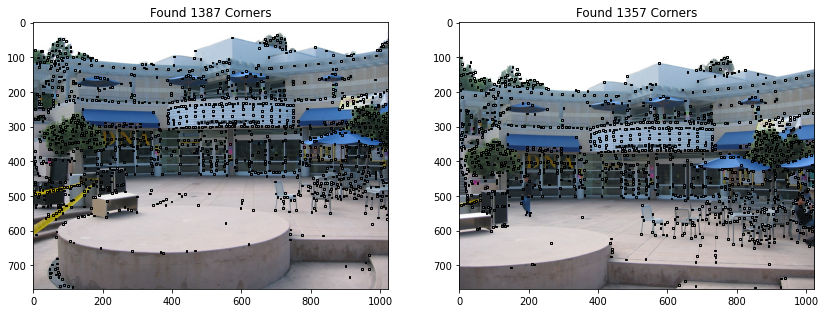

In [7]:
import time

# input images
I1_rgb = np.array(Image.open('IMG_5030.jpg'), dtype='float')/255.
I2_rgb = np.array(Image.open('IMG_5031.jpg'), dtype='float')/255.

I1 = 0.21263903 * I1_rgb[...,0] + 0.71516871 * I1_rgb[...,1] + 0.072192319 * I1_rgb[...,2]
I2 = 0.21263903 * I2_rgb[...,0] + 0.71516871 * I2_rgb[...,1] + 0.072192319 * I2_rgb[...,2]

# parameters to tune
w = 5
t = 0.027
w_nms = 7

tic = time.time()

# run feature detection algorithm on input images
C1, pts1, J1_0, J1_1, J1_2 = run_feature_detection(I1, w, t, w_nms)
C2, pts2, J2_0, J2_1, J2_2 = run_feature_detection(I2, w, t, w_nms)
toc = time.time() - tic

print('took %f secs'%toc)

# display results
plt.figure(figsize=(14,24))

# show corners on original images
ax = plt.subplot(1,2,1)
plt.imshow(I1_rgb)
for i in range(C1): # draw rectangles of size w around corners
    x,y = pts1[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
# plt.plot(pts1[0,:], pts1[1,:], '.b') # display subpixel corners
plt.title('Found %d Corners'%C1)

ax = plt.subplot(1,2,2)
plt.imshow(I2_rgb)
for i in range(C2):
    x,y = pts2[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
# plt.plot(pts2[0,:], pts2[1,:], '.b')
plt.title('Found %d Corners'%C2)

plt.show()

#### Final values for parameters
* w = 5
* t = 0.027
* w_nms = 7
* C1 = 1387
* C2 = 1357

## Problem 3 (Programming): Feature matching (15 points)
Determine the set of one-to-one putative feature correspondences by performing
a brute-force search for the greatest correlation coefficient value (in the range
[-1, 1]) between the detected features in image 1 and the detected features in
image 2. Only allow matches that are above a specified correlation coefficient
threshold value (note that calculating the correlation coefficient allows for adjusting
the size of the matching window without changing the threshold value).
Further, only allow matches that are above a specified distance ratio threshold
value, where distance is measured to the next best match for a given feature.
Vary these parameters such that <strong>225-275</strong> putative feature correspondences are
established. Optional: constrain the search to coordinates in image 2 that are
within a proximity of the detected feature coordinates in image 1.

**Note: You must center each window at the sub-pixel corner
coordinates while computing normalized cross correlation; otherwise, you
will lose points.**

#### Report your final values for:
* the size of the matching window
* the correlation coefficient threshold
* the distance ratio threshold 
* the size of the proximity window (if used)
* the resulting number of putative feature correspondences (i.e. matched features)

#### Display figures for:
* pair of images, where the matched features are indicated by a square window (the size of the matching window) about the feature and a line segment is drawn from the feature to the coordinates of the corresponding feature in the other image

A typical implementation takes around <strong>40</strong> seconds. If yours takes more than <strong>80</strong> seconds, you may lose points.

In [9]:
from scipy.interpolate import RegularGridInterpolator as RGI
from tqdm import tqdm

def interpolate(I, pts, w):
    p = floor(w/2)
    N = pts.shape[1]
    m,n = I.shape
    
    x,y = np.linspace(0,m-1, m), np.linspace(0,n-1,n)
    interp = RGI((x,y), I, bounds_error=False, fill_value=None)

    dict = {}

    for i in range(N):
        pt = pts[:,i]
        xx = np.linspace(pt[1] -p, pt[1] +p, w)
        yy = np.linspace(pt[0] -p, pt[0] +p, w)
        
        ptx, pty = np.meshgrid(xx,yy, indexing='ij')

        interp_vals = interp((ptx, pty))

        dict[tuple(pt)] = interp_vals

    return dict

def compute_ncc(I1, I2, pts1, pts2, w, p):
    # compute the normalized cross correlation between image patches I1, I2
    # result should be in the range [-1,1]
    #    
    # Do ensure that windows are centered at the sub-pixel co-ordinates 
    #      while computing normalized cross correlation.
    #
    # inputs:
    # I1, I2 are the input images
    # pts1, pts2 are the point to be matched
    # w is the size of the matching window to compute correlation coefficients
    # p is the size of the proximity window
    #
    # output:
    # normalized cross correlation matrix of scores between all windows in 
    #    image 1 and all windows in image 2
    
    """your code here"""
    
    def normalize_window(window):
        _mean = np.mean(window)
        _stdev = np.sqrt(np.sum((window - _mean) ** 2))
        return (window - _mean) / (_stdev + 1e-6)


    N1 = pts1.shape[1]
    N2 = pts2.shape[1]
    scores = np.zeros((N1, N2))

    p = floor(w/2)

    dict1 = interpolate(I1, pts1, w)
    dict2 = interpolate(I2, pts2, w)

    for i in (range(N1)):
        W1 = dict1[tuple(pts1[:,i])]
        W1_norm = normalize_window(W1)

        for j in range(N2):
            W2 = dict2[tuple(pts2[:,j])]
            W2_norm = normalize_window(W2)

            scores[i,j] = np.sum(np.multiply(W1_norm, W2_norm))    
    
    return scores

def perform_match(scores, t, d):
    # perform the one-to-one correspondence matching on the correlation coefficient matrix
    # 
    # inputs:
    # scores is the NCC matrix
    # t is the correlation coefficient threshold
    # d distance ration threshold
    #
    # output:
    # 2xM array of the feature coordinates in image 1 and image 2,
    # where M is the number of matches.
    
    """your code here"""
    inds = []
    mask = np.ones_like(scores)
    masked_corr = mask * scores
    

    while(True):
        
        best_match_idx = np.argmax(masked_corr)
        best_match_idx = np.unravel_index(best_match_idx, masked_corr.shape)
        
        # print(best_match_idx)
        best_match_val = np.max(masked_corr)
        temp = scores[best_match_idx]
        scores[best_match_idx] = -1
        # print(scores[best_match_idx])

        max_row = np.max(scores[best_match_idx[0],:])
        max_col = np.max(scores[:,best_match_idx[1]])

        next_best_match_val = max(max_row, max_col)

        scores[best_match_idx] = temp

        if ((1 - best_match_val) < ((1 - next_best_match_val)*d)):
            # store feature match
            inds.append(best_match_idx)

        # set rows and columns to false
        masked_corr[best_match_idx[0],:] = -1
        masked_corr[:,best_match_idx[1]] = -1

        if np.max(masked_corr) < t:
            break
    
    inds = np.array(inds).T

    return inds



def run_feature_matching(I1, I2, pts1, pts2, w, t, d, p):
    # inputs:
    # I1, I2 are the input images
    # pts1, pts2 are the point to be matched
    # w is the size of the matching window to compute correlation coefficients
    # t is the correlation coefficient threshold
    # d distance ration threshold
    # p is the size of the proximity window
    #
    # outputs:
    # inds is a 2xk matrix of matches where inds[0,i] indexs a point pts1 
    #     and inds[1,i] indexs a point in pts2, where k is the number of matches
    
    scores = compute_ncc(I1, I2, pts1, pts2, w, p)
    inds = perform_match(scores, t, d)
    return inds

def prox(match1, match2, p):
    m1 = []
    m2 = []
    for i in range(match1.shape[1]):
        if np.linalg.norm(match1[:,i] - match2[:,i]) < p:
            m1.append(match1[:,i])
            m2.append(match2[:,i])
    return np.array(m1).T, np.array(m2).T

took 50.532001 secs


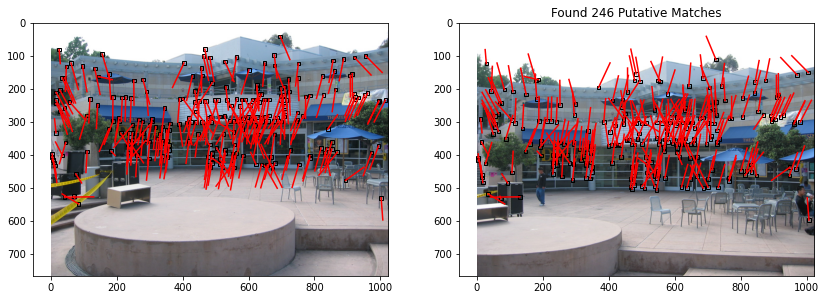

unique points in image 1: 570
unique points in image 2: 570


In [10]:
# parameters to tune
w = 11
t = 0.8
d = 2
p = 90

tic = time.time()
# run the feature matching algorithm on the input images and detected features
inds = run_feature_matching(I1, I2, pts1, pts2, w, t, d, p)
toc = time.time() - tic

print('took %f secs'%toc)

# create new matrices of points which contain only the matched features 
# match1 = pts1[:,inds[0,:].astype('int')]
# match2 = pts2[:,inds[1,:].astype('int')]

m1 = pts1[:,inds[0,:].astype('int')]
m2 = pts2[:,inds[1,:].astype('int')]

match1, match2 = prox(m1, m2, p)

# # display the results
plt.figure(figsize=(14,24))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1_rgb)
ax2.imshow(I2_rgb)
plt.title('Found %d Putative Matches'%match1.shape[1])
for i in range(match1.shape[1]):
    x1,y1 = match1[:,i]
    x2,y2 = match2[:,i]
    ax1.plot([x1, x2],[y1, y2],'-r')
    ax1.add_patch(patches.Rectangle((x1-w/2,y1-w/2),w,w, fill=False))
    ax2.plot([x2, x1],[y2, y1],'-r')
    ax2.add_patch(patches.Rectangle((x2-w/2,y2-w/2),w,w, fill=False))

plt.show()

print('unique points in image 1: %d'%np.unique(inds[0,:]).shape[0])
print('unique points in image 2: %d'%np.unique(inds[1,:]).shape[0])

#### Final values for parameters
* w = 11
* t = 0.8
* d = 2
* p = 90
* num_matches = 246

## Problem 4 (Programming): Outlier Rejection (20 points)
  
  The resulting set of putative point correspondences should contain both inlier
and outlier correspondences (i.e., false matches). Determine the set of inlier point
correspondences using the M-estimator Sample Consensus (MSAC) algorithm,
where the maximum number of attempts to find a consensus set is determined
adaptively. For each trial, you must use the 7-point algorithm (as described in
lecture) to estimate the fundamental matrix, resulting in 1 or 3 solutions. Calculate 
the (squared) Sampson error as a first order approximation to the geometric error.

Hint: this problem has codimension 1

Also: fix a random seed in your MSAC. If I cannot reproduce your results, you will lose points. But don't try to find a good seed as I will run your code using different seeds. Try to get 170-220 inliers every time you run MSAC.

#### Report your values for:
 * the probability $p$ that as least one of the random samples does not contain any outliers
 * the probability $\alpha$ that a given point is an inlier
 * the resulting number of inliers
 * the number of attempts to find the consensus set
 * the tolerance for inliers
 * the cost threshold
 * random seed
 
#### Display figures for:
* pair of images, where the inlier features in each of the images are indicated by a square window about the feature and a line segment is drawn from the feature to the coordinates of the corresponding feature in the other image

took 3.951318 secs
15 iterations
inlier count:  204
inliers:  [  0   1   2   3   4   5   6   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  27  28  29  30  31  32  33  34  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  60  61  62  63  64  65  66  67  68  69  70  71  72  74  75  76
  77  78  79  80  82  83  84  85  86  87  88  89  90  91  92  93  94  97
  98  99 100 101 102 104 105 107 108 110 111 112 113 114 115 116 117 118
 119 120 122 123 125 126 127 129 130 131 132 133 135 136 139 140 141 142
 143 144 145 146 147 148 150 152 153 154 155 156 157 158 159 160 161 162
 163 166 167 168 169 171 173 174 175 176 177 178 181 182 183 185 186 187
 188 190 191 193 194 195 197 198 199 201 202 203 204 206 207 208 209 210
 211 213 215 216 217 218 219 220 222 223 224 225 228 230 232 233 235 236
 237 239 240 241 242 245]
MSAC Cost = 446.044109082
F_MSAC =
[[-4.75320015e-09  9.38838851e-06 -3.10998137e-03]
 [-8.55757317e-06  9.12

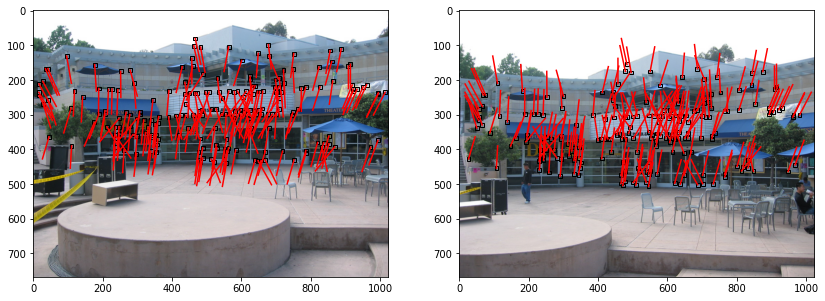

In [26]:
from scipy.stats import chi2
import sympy as sp

def display_results(F, title):
    print(title+' =')
    print(F/np.linalg.norm(F)*np.sign(F[-1,-1]))

def homogenize(x):
    # converts points from inhomogeneous to homogeneous coordinates
    return np.vstack((x,np.ones((1,x.shape[1]))))

def dehomogenize(x):
    # converts points from homogeneous to inhomogeneous coordinates
    return x[:-1]/x[-1]

def data_normalize(pts):
    # Input:
    # pts - 2D scene points
    # Outputs:
    # pts - data normalized points
    # T - corresponding transformation matrix
    
    """your code here"""
    mu = np.mean(pts, axis=1)
    var = np.var(pts, axis=1)

    s = sqrt((pts.shape[0]) / np.sum(var))
    
    T = np.eye(pts.shape[0]+1); T[:-1,-1] = -s*mu; T[np.diag_indices(pts.shape[0])] = s
    
    pts = T @ homogenize(pts)    
    # print(pts.shape)
    return pts, T

def sampsonError(x1, x2, F):
    '''
    x1: 2D image points in image1
    x2: 2D image points in image2
    F: fundamental matrix (3,3)
    '''
    J = np.zeros((1,4))
    J[0,0] = x2[0]*F[0,0] + x2[1]*F[1,0] + F[2,0]
    J[0,1] = x2[0]*F[0,1] + x2[1]*F[1,1] + F[2,1]
    J[0,2] = x1[0]*F[0,0] + x1[1]*F[0,1] + F[0,2]
    J[0,3] = x1[0]*F[1,0] + x1[1]*F[1,1] + F[1,2]

    eps = x1[0]*x2[0]*F[0,0] + x1[0]*x2[1]*F[1,0] + x1[0]*F[2,0] + x1[1]*x2[0]*F[0,1] +\
          x1[1]*x2[1]*F[1,1] + x1[1]*F[2,1] + x2[0]*F[0,2] + x2[1]*F[1,2] + F[2,2]
    
    return ((eps**2)/(J @ J.T)).item()

def compute_MSAC_cost(H,x1,x2,tol):
    # Inputs:
    # x1 - 2D points in image 1 (2,N)
    # x2 - 2D points in image 2 (2,N)
    # H - planar projective transformation matrix 
    # tol - tolerance for establishing datum/model compatibility
    #
    # Output:
    # cost - Squared sampson error
    """your code here"""

    cost = 0
    for i in range(x1.shape[1]):
        err = sampsonError(x1[:,i:i+1], x2[:,i:i+1], H)
        if err <= tol:
            cost += err
        else:
            cost += tol

    return cost

def getModel(x1, x2, T1, T2):
    A = np.zeros((x1.shape[1],9))

    for i in range(x1.shape[1]):
        A[i,:] = np.kron(x2[:,i:i+1].T, x1[:,i:i+1].T)
    
    V = np.linalg.svd(A)[-1]

    F1, F2 = V[-2].reshape(3,3), V[-1].reshape(3,3)
    
    alpha = sp.symbols('alpha')
    
    F = sp.Matrix(alpha*F1 + F2)
    roots = sp.solve(sp.Matrix.det(F), alpha)
    roots = np.array(roots).astype(np.complex64)

    roots_list = []
    for r_ in roots:
        if abs(r_.imag) < 1e-6:
            roots_list.append(r_.real)    

    F_cand = []
    for alpha_ in roots_list:
        F_cand.append(T2.T @ (alpha_*F1 + F2) @ T1)

    return F_cand

def determine_inliers(pts1, pts2, thresh, tol, p):
    # Inputs:
    #    pts1 - matched feature correspondences in image 1
    #    pts2 - matched feature correspondences in image 2
    #    thresh - cost threshold
    #    tol - reprojection error tolerance 
    #    p - probability that as least one of the random samples does not contain any outliers   
    #
    # Output:
    #    consensus_min_cost - final cost from MSAC
    #    consensus_min_cost_model - fundamental matrix F
    #    inliers - list of indices of the inliers corresponding to input data
    #    trials - number of attempts taken to find consensus set
    
    """your code here"""
    
    
    
    trials = 0
    max_trials = np.inf
    consensus_min_cost = np.inf
    consensus_min_cost_model = np.zeros((3,3))
    s = 7

    # can remove seed
    np.random.seed(22)
    while(trials < max_trials):
        
        cand_idx = np.random.choice(pts1.shape[1], size=s, replace=False)
        x1, T1 = data_normalize(pts1[:,cand_idx])
        x2, T2 = data_normalize(pts2[:,cand_idx])
        F_model = getModel(x1,x2, T1, T2)
        for F_cand in F_model:
            cost = compute_MSAC_cost(F_cand, pts1, pts2, tol)
            error_arr = np.zeros(pts1.shape[1])
            for i in range(pts1.shape[1]):
                error_arr[i] = sampsonError(pts1[:,i], pts2[:,i], F_cand)
            
            if cost < consensus_min_cost:
                consensus_min_cost = cost
                consensus_min_cost_model = F_cand
                inliers = np.argwhere(error_arr <= tol).flatten()

                w = inliers.shape[0]/pts1.shape[1]
                if w != 0:
                    max_trials = log(1 - p) / log(1 - w**s)
        trials += 1


    return consensus_min_cost, consensus_min_cost_model, inliers, trials


# MSAC parameters 
thresh = 0
alpha = 0.95
tol = chi2.ppf(alpha,2)
p = 0.99

tic=time.time()

cost_MSAC, F_MSAC, inliers, trials = determine_inliers(match1, match2, thresh, tol, p)

# choose just the inliers
xin1 = match1[:,inliers]
xin2 = match2[:,inliers]

toc=time.time()
time_total=toc-tic

# display the results
print('took %f secs'%time_total)
print('%d iterations'%trials)
print('inlier count: ',len(inliers))
print('inliers: ',inliers)
print('MSAC Cost = %.9f'%cost_MSAC)
display_results(F_MSAC, 'F_MSAC')

# display the figures
plt.figure(figsize=(14,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1_rgb)
ax2.imshow(I2_rgb)

for i in range(xin1.shape[1]):
    x1,y1 = xin1[:,i]
    x2,y2 = xin2[:,i]
    ax1.plot([x1, x2],[y1, y2],'-r')
    ax1.add_patch(patches.Rectangle((x1-w/2,y1-w/2),w,w, fill=False))
    ax2.plot([x2, x1],[y2, y1],'-r')
    ax2.add_patch(patches.Rectangle((x2-w/2,y2-w/2),w,w, fill=False))

plt.show()

#### Final values for parameters
* random seed = 22
* $p$ = 0.99
* $\alpha$ = 0.95
* tolerance = 5.99
* threshold = 100
* num_inliers = 204
* num_attempts = 15
* consensus_min_cost = 446.044109082

## Problem 5 (Programming): Linear Estimation of the Fundamental Matrix (15 points)
  Estimate the fundamental matrix $\boldsymbol{F}_\text{DLT}$ from the
  resulting set of inlier correspondences using the direct linear
  transformation (DLT) algorithm (with data normalization).  Include
  the numerical values of the resulting $\boldsymbol{F}_\text{DLT}$, scaled
  such that $||\boldsymbol{F}_\text{DLT}||_\text{Fro} = 1$

In [27]:
def homogenize(x):
    # converts points from inhomogeneous to homogeneous coordinates    
    return np.vstack((x,np.ones((1,x.shape[1]))))

def dehomogenize(x):
    # converts points from homogeneous to inhomogeneous coordinates   
    return x[:-1]/x[-1]

def estimate_fundamental_matrix_linear(x1, x2, normalize=True):
    # Inputs:
    #    x1 - inhomogeneous inlier correspondences in image 1
    #    x2 - inhomogeneous inlier correspondences in image 2
    #    normalize - if True, apply data normalization to x1 and x2
    #
    # Outputs:
    #    F - the DLT estimate of the fundamental matrix  
    
    """your code here"""
    
    # data normalization
    if normalize:
        x1, T1 = data_normalize(x1)
        x2, T2 = data_normalize(x2)
    
    # data denormalization
    else:
        x1 = homogenize(x1)
        x2 = homogenize(x2)
       
    A = np.zeros((x1.shape[1], 9))
    for i in range(x1.shape[1]):
        A[i, :] = np.kron(x2[:,i:i+1].T, x1[:,i:i+1].T)
    
    V = np.linalg.svd(A)[-1]
    F = V[-1].reshape(3,3)

    u,d,vh = np.linalg.svd(F)
    d[-1] = 0
    F_DN = u @ np.diag(d) @ vh

    if normalize:
        F = T2.T @ F_DN @ T1

    # F = F/np.linalg.norm(F)*np.sign(F[-1,-1])

    return F


# compute the linear estimate with data normalization
print ('DLT with Data Normalization')
time_start=time.time()
xins = np.load("xin.npy.npz")
xin1_ = xins["xin1"]
xin2_ = xins["xin2"]
F_DLT = estimate_fundamental_matrix_linear(xin1, xin2, normalize=True)
time_total=time.time()-time_start

# display the resulting F_DLT, scaled with its frobenius norm
display_results(F_DLT, 'F_DLT')

DLT with Data Normalization
F_DLT =
[[ 1.03216762e-08  2.43287542e-06 -8.77297605e-04]
 [-1.34786151e-06  2.31569285e-07 -1.08005418e-02]
 [ 6.17285348e-04  9.90250539e-03  9.99892063e-01]]


## Problem 6 (Programming): Nonlinear Estimation of the Fundamental Matrix (70 points) 
  Retrieve the camera projection matrices $\boldsymbol{P} = [\boldsymbol{I} \,|\,
  \boldsymbol{0}]$ and $\boldsymbol{P}' = [\boldsymbol{M} \,|\, \boldsymbol{v}]$, where $\boldsymbol{M}$
  is full rank, from $\boldsymbol{F}_\text{DLT}$.  Use the resulting camera
  projection matrix $\boldsymbol{P}'$ associated with the second image and
  the triangulated 3D points as an initial estimate to an iterative
  estimation method, specifically the sparse Levenberg-Marquardt
  algorithm, to determine the Maximum Likelihood estimate of the
  fundamental matrix $\boldsymbol{F} = [\boldsymbol{v}]_\times \boldsymbol{M}$ that
  minimizes the reprojection error.  The initial estimate of the 3D
  points must be determined using the two-view optimal triangulation
  method described in lecture (algorithm 12.1 in the Hartley \&
  Zisserman book, but use the ray-plane intersection method for the
  final step instead of the homogeneous method).  Additionally, you
  must parameterize the camera projection matrix $\boldsymbol{P}'$ associated
  with the second image and the homogeneous 3D scene points that are
  being adjusted using the parameterization of homogeneous vectors.
  
  Report the initial cost (i.e. cost at iteration 0) and the cost at the end
  of each successive iteration. Show the numerical values for the final 
  estimate of the fundamental matrix $\boldsymbol{F}_\text{LM}$, scaled
  such that $||\boldsymbol{F}_\text{LM}||_\text{Fro} = 1$.

In [15]:
def sinc(x):
    """your code here"""
    if x == 0:
        return 1
    else:
        return np.sin(x) / x

def d_sinc(x):
    # Returns a scalar valued sinc value
    """your code here"""
    
    if x == 0:
        return 0
    else:
        return (np.cos(x) / x) - (np.sin(x) / (x**2))

def parameterize_matrix(P):
    # wrapper function to interface with LM
    # takes all optimization variables and parameterizes all of them

    return parameterize_homog(P.reshape(-1,1))

def deparameterize_matrix(m,rows,columns):
    # Deparameterize all optimization variables
    # Input:
    #   m - matrix to be deparameterized
    #   rows - number of rows of the deparameterized matrix 
    #   columns - number of rows of the deparameterized matrix 
    #
    # Output:
    #    deparameterized matrix

    return deparameterize_homog(m).reshape(rows,columns)


def parameterize_homog(v_bar):
    # Given a homogeneous vector v_bar (n x 1) return its minimal parameterization ((n - 1) x 1)
    """your code here"""
    v_bar = v_bar/np.linalg.norm(v_bar)

    a = v_bar[0]
    b = v_bar[1:,:].reshape(-1,1)

    v = (2 / sinc(np.arccos(a))) * b

    mod = np.linalg.norm(v)
    if mod > np.pi:
        v = (1 - ((2*pi / mod) * ceil((mod - pi) / (2*pi)))) * v
    # print(mod, np.linalg.norm(v))
    assert np.linalg.norm(v) <= pi    
    return v


def deparameterize_homog(v):
    # Given a parameterized homogeneous vector (n x 1) return its deparameterization ((n + 1) x 1)
    """your code here"""
    v_bar = np.zeros((v.shape[0]+1,1))
    
    mod = np.linalg.norm(v)

    v_bar[0] = np.cos(mod/2)

    v_bar[1:] = (sinc(mod/2) / 2) * v    
    
    assert v_bar.shape[1] == 1    
    return v_bar


def partial_vbar_partial_v(v):
    # Input:
    # v - homogeneous parameterized vector (n x 1)
    # Output:
    # d_vbar_d_v - derivative of vbar w.r.t v ((n + 1) x n)

    """your code here"""
    d_vbar_d_v = np.zeros((v.shape[0]+1,v.shape[0]))
    v = v.reshape(-1,1)
    # print(v.shape)

    v_bar = deparameterize_homog(v).reshape(-1,1)

    a = v_bar[0]
    b = v_bar[1:].reshape(-1,1)

    mod = np.linalg.norm(v)
    
    if mod == 0:
        da_dv = np.zeros((1,8))
        db_dv = 0.5 * np.eye(8)
    else:
        da_dv = -0.5 * b.T
        db_dv = 0.5 * sinc(mod/2) * np.eye(v.shape[0]) +\
              ((1/(4*mod)) * (d_sinc(mod/2)) * (v @ v.T))

    d_vbar_d_v[0,:] = da_dv.reshape(1,-1)
    d_vbar_d_v[1:,:] = db_dv    
    
    return d_vbar_d_v


def partial_x_hat_partial_p_hat(P, X):
    # compute the dx_hat_dp_hat component for the Jacobian
    #
    # Input:
    #    P - 3x4 projection matrix
    #    X - Homogenous 3D scene point (4x1)
    # Output:
    #    dx_hat_dp_hat - 2x11 matrix
    
    dx_hat_dp_hat = np.zeros((2, 11))
    
    """your code here"""
    dp_bar_dp_hat = partial_vbar_partial_v(parameterize_matrix(P))

    dx_hat_dp_bar = np.zeros((2,12))
    x_tilde = dehomogenize(P@X)
    w = P[-1].reshape(1,-1) @ X

    dx_hat_dp_bar[0,:4] = X.T
    dx_hat_dp_bar[0,-4:] = -x_tilde[0] * X.T

    dx_hat_dp_bar[1,4:8] = X.T
    dx_hat_dp_bar[1,-4:] = -x_tilde[1] * X.T

    dx_hat_dp_bar = dx_hat_dp_bar/w

    dx_hat_dp_hat = dx_hat_dp_bar @ dp_bar_dp_hat

    return dx_hat_dp_hat


def partial_x_hat_partial_X_hat(P, X):
    # compute the dx_hat_dX_hat component for the Jacobian
    #
    # Input:
    #    P - 3x4 projection matrix
    #    X - Homogenous 3D scene point (4x1)
    # Output:
    #    dx_hat_dX_hat - 2x3 matrix
    
    dx_hat_dX_hat = np.zeros((2, 3))
    
    """your code here"""

    dX_bar_dX_hat = partial_vbar_partial_v(parameterize_matrix(X))

    dx_hat_dX_bar = np.zeros((2,4))

    x_tilde = dehomogenize(P @ X)

    w = P[-1].reshape(1,-1) @ X

    dx_hat_dX_bar[0] = P[0].reshape(1,-1) - x_tilde[0]*P[2].reshape(1,-1)
    dx_hat_dX_bar[1] = P[1].reshape(1,-1) - x_tilde[1]*P[2].reshape(1,-1)

    dx_hat_dX_bar = dx_hat_dX_bar / w

    dx_hat_dX_hat = dx_hat_dX_bar @ dX_bar_dX_hat
    
    return dx_hat_dX_hat

def parameterize_x(x):
    '''
    x: scene point (4,N)
    '''
    x_ = np.zeros((x.shape[0]-1, x.shape[1]))
    for i in range(x.shape[1]):
        x_[:, i:i+1] = parameterize_homog(x[:,i:i+1])
    
    return x_

def deparameterize_x(x):
    '''
    x: parameterized scene points (2,N)
    '''
    x_ = np.zeros((x.shape[0]+1, x.shape[1]))
    for i in range(x.shape[1]):
        x_[:, i:i+1] = deparameterize_homog(x[:,i:i+1])
    
    return x_

def get_UVW(X_scene, P1, P2, covarx1_inv, covarx2_inv):
    '''
    x1_hat: points-1 (3,N)
    x2_hat: points-2 (3,N)
    X_scene: deparam-param triangulated 3D points (4,N)
    '''
    n_points = X_scene.shape[1]
    Ap = np.zeros((2*n_points, 11))
    B = np.zeros((2*n_points, 3*n_points))
    Bp = np.zeros((2*n_points, 3*n_points))
    U = np.zeros((11,11))
    V = np.zeros((3*n_points, 3*n_points))
    W = np.zeros((11, 3*n_points))

    for i in range(n_points):
        Ap[2*i:2*i+2] = partial_x_hat_partial_p_hat(P2, X_scene[:,i:i+1])
        B[2*i:2*i+2, 3*i:3*i+3] = partial_x_hat_partial_X_hat(P1, X_scene[:,i:i+1])
        Bp[2*i:2*i+2, 3*i:3*i+3] = partial_x_hat_partial_X_hat(P2, X_scene[:,i:i+1])
        
        U += Ap[2*i:2*i+2].T @ covarx2_inv[2*i:2*i+2, 2*i:2*i+2] @ Ap[2*i:2*i+2]
        V[3*i:3*i+3, 3*i:3*i+3] = B[2*i:2*i+2, 3*i:3*i+3].T @ covarx1_inv[2*i:2*i+2, 2*i:2*i+2] @\
              B[2*i:2*i+2, 3*i:3*i+3] + Bp[2*i:2*i+2, 3*i:3*i+3].T @\
                  covarx2_inv[2*i:2*i+2, 2*i:2*i+2] @ Bp[2*i:2*i+2, 3*i:3*i+3]
        W[:,3*i:3*i+3] = Ap[2*i:2*i+2].T @\
              covarx2_inv[2*i:2*i+2, 2*i:2*i+2] @ Bp[2*i:2*i+2, 3*i:3*i+3]

    return Ap, B, Bp, U, V, W

def getDelta(Ap, B, Bp, Up, V, Wp, covarx1_inv, covarx2_inv, eps1, eps2, lr):
    
    '''
    Ap: (2N,11)
    B: (2N,3N)
    Bp: (2N,3N)
    U: (11,11)
    V: (3N,3N)
    W: (11,3N)
    covarx1_inv: (2N,2N)
    covarx2_inv: (2N,2N)
    eps1: (2N,1)
    eps2: (2N,1)
    lr: scalar
    '''

    n_points = int(Ap.shape[0]/2)
    V_star = np.zeros((3*n_points, 3*n_points))
    eps_ap = np.zeros((11,1))
    eps_b = np.zeros((3*n_points,1))
    delta_b = np.zeros((3*n_points,1))
    Sp = np.zeros((11,11))
    ep = np.zeros((11,1))

    # V_star = V + np.eye(3*n_points)

    for i in range(n_points):
        
        eps_ap += Ap[2*i:2*i+2].T @ covarx2_inv[2*i:2*i+2, 2*i:2*i+2] @ eps2[2*i:2*i+2, :]

        eps_b[3*i:3*i+3] = B[2*i:2*i+2, 3*i:3*i+3].T @ covarx1_inv[2*i:2*i+2, 2*i:2*i+2] @\
              eps1[2*i:2*i+2, :] + Bp[2*i:2*i+2, 3*i:3*i+3].T @\
                  covarx2_inv[2*i:2*i+2, 2*i:2*i+2] @ eps2[2*i:2*i+2, :]
        
        V_star[3*i:3*i+3, 3*i:3*i+3] = V[3*i:3*i+3, 3*i:3*i+3] + lr*np.eye(3)

        Sp += Wp[:,3*i:3*i+3] @ np.linalg.inv(V_star[3*i:3*i+3, 3*i:3*i+3]) @ Wp[:,3*i:3*i+3].T
        ep += Wp[:,3*i:3*i+3] @ np.linalg.inv(V_star[3*i:3*i+3, 3*i:3*i+3]) @ eps_b[3*i:3*i+3,:]
        

    Up_star = Up + lr*np.eye(11)

    Sp = Up_star - Sp
    ep = eps_ap - ep

    delta_ap = np.linalg.inv(Sp) @ ep

    for i in range(n_points):
        delta_b[3*i:3*i+3] = np.linalg.inv(V_star[3*i:3*i+3, 3*i:3*i+3]) @\
              (eps_b[3*i:3*i+3] - Wp[:,3*i:3*i+3].T @ delta_ap)

    return delta_ap, delta_b

def compute_cost(x1, x2, X_scene_hat, P1_hat, P2_hat, covarx1_inv, covarx2_inv):
    # Inputs:
    # x1 - 2D points in image 1 (3,N)
    # x2 - 2D points in image 2 (3,N)
    # X_scene_hat - 3D scene points (4,N)
    # P - projective matrix (3x4)
    # cov1 - covariance matrix associated with points in image 1
    # cov2 - covariance matrix associated with points in image 2
    #
    # Output:
    # cost - total error
    """your code here"""
    
    cost = 0
    # P2_hat = deparameterize_matrix(parameterize_matrix(P2_hat), 3,4)
    # X_scene_hat = deparameterize_x(parameterize_x(X_scene_hat))

    x2_hat = P2_hat @ X_scene_hat
    x1_hat = P1_hat @ X_scene_hat
    
    eps1 = dehomogenize(x1) - dehomogenize(x1_hat)
    eps1 = np.reshape(eps1, (-1,1), order='F')
    
    eps2 = dehomogenize(x2) - dehomogenize(x2_hat)
    eps2 = np.reshape(eps2, (-1,1), order='F')

    cost = (eps1.T @ covarx1_inv @ eps1) + (eps2.T @ covarx2_inv @ eps2)

    return cost.item()


In [16]:
def data_normalize_with_cov(pts, covarx):
    # data normalization of n dimensional pts
    #
    # Input:
    # pts - is in inhomogeneous coordinates
    # covarx - covariance matrix associated with x. Has size 2n x 2n,
    # where n is number of points.
    # Outputs:
    # pts - data normalized points
    # T - corresponding transformation matrix
    # covarx - normalized covariance matrix
    """your code here"""
    
    pts, T = data_normalize(pts)
    covarx = (T[0,0]**2) * covarx

    return pts, T, covarx

def skew(w):
    # Returns the skew-symmetrix represenation of a vector
    
    """your code here"""
    w_skew = np.zeros((3, 3))
    
    w_skew[0,1] = -w[2]
    w_skew[1,0] = w[2]
    w_skew[0,2] = w[1]
    w_skew[2,0] = -w[1]
    w_skew[1,2] = -w[0]
    w_skew[2,1] = w[0]

    return w_skew

def from_skew(X):
    return np.array([X[2, 1], X[0, 2], X[1, 0]])

def retrieve_projection_matrices(F):
    # Input:
    #    F - DLT estimate of the fundamental matrix (3 x 3)
    # Output:
    #    P - First camera projection matrix
    #    P_prime - Second camera projection matrix
    
    P = np.zeros((3, 4))
    P_prime = np.zeros((3, 4))

    """your code here"""

    P[:3,:3] = np.eye(3)

    U, D1, VT = np.linalg.svd(F)
    
    VT[-1,:] = -VT[-1,:]

    W = np.zeros((3,3))
    W[0,1] = 1
    W[1,0] = -1

    Z = np.zeros((3,3))
    Z[0,1] = -1
    Z[1,0] = 1
    Z[2,2] = 1

    D2 = np.array([[D1[0], 0, 0],
                   [0, D1[1], 0],
                   [0, 0, (D1[0] + D1[1])/2]])
    
    v_skew = U @ W @ U.T
    
    M = -U @ Z @ D2 @ VT

    P_prime[:,:3] = M
    P_prime[:,-1] = from_skew(v_skew)

    return P, P_prime


def get_tmin(f1, f2, a, b, c, d):
    
    t = sp.symbols('t')

    g_t = t * ((a*t + b)**2 + (f2*(c*t + d))**2)**2 -\
          (a*d - b*c)*((1 + (f1*t)**2)**2)*(a*t + b)*(c*t + d)
    poly = sp.poly(g_t, t)

    coeffs = poly.coeffs()
    roots = np.roots(coeffs).astype(np.complex64)

    def s_t(t_):
        return (t_**2)/(1 + (f1*t_)**2) + ((c*t_ + d)**2)/((a*t_ + b)**2 + (f2*(c*t_ + d))**2)

    s = []
    for root in roots:
        s.append(s_t(root.real))

    s_inf = 1/(f1**2) + (c**2)/(a**2 + (f2*c)**2)
    s.append(s_inf)

    idx_min = np.argmin(s)

    if idx_min == len(s)-1:
        t_min = np.inf
    else:
        t_min = roots[idx_min].real

    return t_min


def get_epipolar_lines(f1, f2, a, b, c, d, t_min):
    l1 = np.zeros((3,1))
    l2 = np.zeros((3,1))

    if t_min == np.inf:
        l1[0] = f1
        l1[2] = -1

        l2[0] = -f2*c
        l2[1] = a
        l2[2] = c

    else:
        l1[0] = t_min*f1
        l1[1] = 1
        l1[2] = -t_min
        
        l2[0] = -f2*(c*t_min + d)
        l2[1] = a*t_min + b
        l2[2] = c*t_min + d

    return l1, l2

def closest_point(l):
    l = l.reshape(-1,1)

    x = homogenize(np.zeros((2,1)))
    
    T_21 = np.eye(3)
    T_21[0,-1] = l[0]
    T_21[1,-1] = l[1]
    
    xs2 = T_21 @ x

    lam = - (l.T @ xs2)/(l.T @ x - l.T @ xs2)

    xs_hat = lam*x + (1-lam)*xs2

    return xs_hat

def apply_optimal_correction(x1, x2, F):
    # Input:
    #    x1 - Homogeneous point in image 1 (3 x 1)
    #    x2 - Homogeneous point in image 2 (3 x 1)
    #    F - DLT estimate of the fundamental matrix (3 x 3)
    # Output:
    #    x1_corrected - Homogeneous corrected point in image 1 (3 x 1)
    #    x2_corrected - Homogeneous corrected point in image 2 (3 x 1)
    
    x1_corrected = x1.copy()
    x2_corrected = x2.copy()
    
    """your code here"""

    T1 = np.zeros((3,3))
    T2 = np.zeros((3,3))

    np.fill_diagonal(T1, x1[2])
    T1[0,2] = -x1[0]
    T1[1,2] = -x1[1]

    np.fill_diagonal(T2, x2[2])
    T2[0,2] = -x2[0]
    T2[1,2] = -x2[1]

    Fs = np.linalg.inv(T2).T @ F @ np.linalg.inv(T1)

    e1 = np.linalg.svd(Fs)[-1][-1].reshape(-1,1)
    e2 = np.linalg.svd(Fs.T)[-1][-1].reshape(-1,1)    

    e1 = e1 / sqrt(e1[0]**2 + e1[1]**2)
    e2 = e2 / sqrt(e2[0]**2 + e2[1]**2)

    R1 = np.zeros((3,3))
    R2 = np.zeros((3,3))    

    R1[0,0] = R1[1,1] = e1[0]
    R1[0,1] = e1[1]
    R1[1,0] = -e1[1]
    R1[2,2] = 1

    R2[0,0] = R2[1,1] = e2[0]
    R2[0,1] = e2[1]
    R2[1,0] = -e2[1]
    R2[2,2] = 1   

    Fs = R2 @ Fs @ R1.T 

    f1 = e1[2,0]
    f2 = e2[2,0]

    a = Fs[1,1]
    b = Fs[1,2]
    c = Fs[2,1]
    d = Fs[2,2]

    t_min = get_tmin(f1, f2, a, b, c, d)

    l1, l2 = get_epipolar_lines(f1, f2, a, b, c, d, t_min)

    xs1_hat = closest_point(l1)
    xs2_hat = closest_point(l2)

    x1_corrected = np.linalg.inv(T1) @ R1.T @ xs1_hat
    x2_corrected = np.linalg.inv(T2) @ R2.T @ xs2_hat

    return x1_corrected, x2_corrected


def triangulate_scene_point(x1, x2, F):
    # Input:
    #    x1 - Homogeneous point in image 1 (3 x 1)
    #    x2 - Homogeneous point in image 2 (3 x 1)
    #    F - DLT estimate of the fundamental matrix (3 x 3)
    # Output:
    #    X_scene = Triangulated homogeneous 3D scene point (4 x 1)
    
    X_scene = np.zeros((4, 1))
    
    """your code here"""
    x1, x2 = apply_optimal_correction(x1, x2, F)
    P1, P2 = retrieve_projection_matrices(F)

    l2 = F @ x1.reshape(-1,1)

    l2_perpendicular = np.array([-l2[1]*x2[2],
                                  l2[0]*x2[2],
                                  l2[1]*x2[0] - l2[0]*x2[1]]).reshape(-1,1)
    
    pi_arr = P2.T @ l2_perpendicular

    X2 = P1.T @ x1

    X_scene[:3] = pi_arr[-1]*x1.reshape(-1,1)
    X_scene[-1] = -pi_arr[:3].reshape(1,-1) @ x1.reshape(-1,1)

    return X_scene

In [17]:
# Unit tests for Jacobian (Do not change)

def check_values_jacobian():
    eps = 1e-5  # Floating point error threshold
    
    # Givens
    # The parameterized second camera projection matrix (11 x 1)
    p_hat_prime = np.load('unit_test/p_hat_prime.npy')
    
    # The parameterized scene point (3 x 1)
    X_hat = np.load('unit_test/X_hat.npy')
    
    # The first camera projection matrix (3 x 4)
    P = np.load('unit_test/P.npy')
    
    # Targets
    dp_bar_prime_dp_hat_prime_target = np.load('unit_test/dp_bar_prime_dp_hat_prime.npy') 
    dX_bar_dX_hat_target = np.load('unit_test/dX_bar_dX_hat.npy')
    dx_hat_prime_dp_hat_prime_target = np.load('unit_test/dx_hat_prime_dp_hat_prime.npy')
    dx_hat_prime_dX_hat_target = np.load('unit_test/dx_hat_prime_dX_hat.npy')
    dx_hat_dX_hat_target = np.load('unit_test/dx_hat_dX_hat.npy')
    
    # Compute
    dp_bar_prime_dp_hat_prime = partial_vbar_partial_v(p_hat_prime)
    dX_bar_dX_hat = partial_vbar_partial_v(X_hat)
    
    P_prime = deparameterize_homog(p_hat_prime).reshape((3, 4))
    X = deparameterize_homog(X_hat)  # (4 x 1) vector
    
    dx_hat_prime_dp_hat_prime = partial_x_hat_partial_p_hat(P_prime, X)
    dx_hat_prime_dX_hat = partial_x_hat_partial_X_hat(P_prime, X)
    dx_hat_dX_hat = partial_x_hat_partial_X_hat(P, X)
    
    # Check
    dp_bar_prime_dp_hat_prime_valid = np.all(np.abs(dp_bar_prime_dp_hat_prime_target - dp_bar_prime_dp_hat_prime) < eps)
    dX_bar_dX_hat_valid = np.all(np.abs(dX_bar_dX_hat_target - dX_bar_dX_hat) < eps)
    dx_hat_prime_dp_hat_prime_valid = np.all(np.abs(dx_hat_prime_dp_hat_prime_target - dx_hat_prime_dp_hat_prime) < eps)
    dx_hat_prime_dX_hat_valid = np.all(np.abs(dx_hat_prime_dX_hat_target - dx_hat_prime_dX_hat) < eps)
    dx_hat_dX_hat_valid = np.all(np.abs(dx_hat_dX_hat_target - dx_hat_dX_hat) < eps)
    
    print(f'Computed partial_pbar\'_partial_phat\' is equal to the given value +/- {eps}: {dp_bar_prime_dp_hat_prime_valid}')
    print(f'Computed partial_Xbar_partial_Xhat is equal to the given value +/- {eps}: {dX_bar_dX_hat_valid}')
    print(f'Computed partial_xhat\'_partial_phat\' is equal to the given value +/- {eps}: {dx_hat_prime_dp_hat_prime_valid}')
    print(f'Computed partial_xhat\'_partial_Xhat is equal to the given value +/- {eps}: {dx_hat_prime_dX_hat_valid}')
    print(f'Computed partial_xhat_partial_Xhat is equal to the given value +/- {eps}: {dx_hat_dX_hat_valid}')
    
check_values_jacobian()

Computed partial_pbar'_partial_phat' is equal to the given value +/- 1e-05: True
Computed partial_Xbar_partial_Xhat is equal to the given value +/- 1e-05: True
Computed partial_xhat'_partial_phat' is equal to the given value +/- 1e-05: True
Computed partial_xhat'_partial_Xhat is equal to the given value +/- 1e-05: True
Computed partial_xhat_partial_Xhat is equal to the given value +/- 1e-05: True


In [18]:
# Unit tests for optimal triangulation (Do not change)

def check_values_triangulation():
    eps = 1e-5  # Floating point error threshold
    
    # Givens
    # The fundamental matrix (3 x 3)
    F = np.load('unit_test/F.npy')
    
    # Camera projection matrices (3 x 4) each
    P_target = np.zeros((3, 4))
    P_target[:3, :3] = np.eye(3)
    
    # Homogeneous image points (3 x 1) each
    x1 = np.load('unit_test/x1.npy') 
    x2 = np.load('unit_test/x2.npy')
    
    # Targets
    x1_corr_target = np.load('unit_test/x1_corr.npy')
    x2_corr_target = np.load('unit_test/x2_corr.npy')
    
    # Compute
    P, P_prime = retrieve_projection_matrices(F)
    x1_corr, x2_corr = apply_optimal_correction(x1, x2, F)
    X_scene = triangulate_scene_point(x1, x2, F)
    
    # Verify optimal corrected points
    P_valid = np.all(np.abs(P - P_target) < eps)
    x1_corr_valid = np.all(np.abs(dehomogenize(x1_corr_target) - dehomogenize(x1_corr)) < eps)
    x2_corr_valid = np.all(np.abs(dehomogenize(x2_corr_target) - dehomogenize(x2_corr)) < eps)

    # Verify second camera projection matrix
    _, D_P, _ = np.linalg.svd(P_prime[:3, :3])
    U, D_F, _ = np.linalg.svd(F)
    
    s, t = D_F[:-1]
    D_P_target = np.array([s, (s + t) / 2, t])
    D_P_valid = np.all(np.abs(D_P - D_P_target) < eps)
    
    t = P_prime[:, -1]
    t_target = U[:, -1]
    t_valid = np.all(np.abs(t / np.sign(t[0]) - t_target / np.sign(t_target[0])) < eps)
    
    P_prime_valid = D_P_valid and t_valid
    
    # Verify triangulated 3D scene point
    x1_proj = dehomogenize(P @ X_scene)
    x2_proj = dehomogenize(P_prime @ X_scene)
    
    x1_proj_valid = np.all(np.abs(x1_proj - dehomogenize(x1_corr)) < eps)
    x2_proj_valid = np.all(np.abs(x2_proj - dehomogenize(x2_corr)) < eps)
    X_scene_valid = x1_proj_valid and x2_proj_valid
    
    print(f'Computed first camera projection matrix is equal to the given value +/- {eps}: {P_valid}')
    print(f'Computed second camera projection matrix is equal to the given value +/- {eps}: {P_prime_valid}')
    print(f'Computed optimal corrected point in image 1 is equal to the given value +/- {eps}: {x1_corr_valid}')
    print(f'Computed optimal corrected point in image 2 is equal to the given value +/- {eps}: {x2_corr_valid}')
    print(f'Computed triangulated 3D scene point is equal to the given value +/- {eps}: {X_scene_valid}')
    
check_values_triangulation()

Computed first camera projection matrix is equal to the given value +/- 1e-05: True
Computed second camera projection matrix is equal to the given value +/- 1e-05: True
Computed optimal corrected point in image 1 is equal to the given value +/- 1e-05: True
Computed optimal corrected point in image 2 is equal to the given value +/- 1e-05: True
Computed triangulated 3D scene point is equal to the given value +/- 1e-05: True


In [28]:
from scipy.linalg import block_diag
from tqdm import tqdm

def estimate_fundamental_matrix_nonlinear(F, x1, x2, max_iters, lam):
    # Input:
    #    F - DLT estimate of the fundamental matrix
    #    x1 - inhomogeneous inlier points in image 1
    #    x2 - inhomogeneous inlier points in image 2
    #    max_iters - maximum number of iterations
    #    lam - lambda parameter
    # Output:
    #    F - Final fundamental matrix obtained after convergence
    
    """your code here"""

    n_points = x1.shape[1]

    # scene point initialization
    X_scene_ = np.zeros((4, n_points))
    for i in range(n_points):
        X_scene_[:,i] = triangulate_scene_point(homogenize(x1[:,i:i+1]),\
                                                 homogenize(x2[:,i:i+1]), F).flatten()
    
    # data normalization
    covarx = np.eye(2*n_points)
    x1, T1, covarx1 = data_normalize_with_cov(x1, covarx)   # (3,N), (3,3), (2N, 2N)
    x2, T2, covarx2 = data_normalize_with_cov(x2, covarx)   # (3,N), (3,3), (2N, 2N)
    covarx1_inv = np.linalg.inv(covarx1)
    covarx2_inv = np.linalg.inv(covarx2)
    X_scene_hat, Ud = data_normalize(dehomogenize(X_scene_))

    P1, P2 = retrieve_projection_matrices(F)
    P1_hat = T1 @ P1 @ np.linalg.inv(Ud)
    P2_hat = T2 @ P2 @ np.linalg.inv(Ud)

    cost = compute_cost(x1, x2, X_scene_hat, P1_hat, P2_hat, covarx1_inv, covarx2_inv)
    print ('iter %03d Cost %.9f'%(0, cost))
    tau = 1e-7
    for it in range(max_iters):

        # parameterize and deparameterize P2
        p2_hat = parameterize_matrix(P2_hat)         # (11,1)
        P2_hat = deparameterize_matrix(p2_hat, 3,4)  # (3,4)

        p1_hat = parameterize_matrix(P1_hat)         # (11,1)
        P1_hat = deparameterize_matrix(p1_hat, 3,4)  # (3,4)

        # parameterize and deparameterize X_scene
        X_scene_param = parameterize_x(X_scene_hat)     # (3,N)
        X_scene_hat = deparameterize_x(X_scene_param)   # (4,N)

        # get x1_hat, x2_hat
        x1_hat = P1_hat @ X_scene_hat      # (3,N)
        x2_hat = P2_hat @ X_scene_hat      # (3,N)

        # get epsilons
        eps1 = np.reshape(dehomogenize(x1) - dehomogenize(x1_hat), (-1,1), order='F')     # (2N,1)
        eps2 = np.reshape(dehomogenize(x2) - dehomogenize(x2_hat), (-1,1), order='F')     # (2N,1)        

        # get_UVW
        A, B, Bp, U, V, W = get_UVW(X_scene_hat, P1_hat, P2_hat, covarx1_inv, covarx2_inv)        
        
        while (True):
            # break
            # get delta
            delta_ap, delta_b = getDelta(A, B, Bp, U, V, W,\
                                         covarx1_inv, covarx2_inv, eps1, eps2, lam)     # (11,1), (3N,1)

            # deparameterize p vector
            p2_hat_cand = p2_hat + delta_ap                         # (11,1)
            P2_hat_cand = deparameterize_matrix(p2_hat_cand, 3,4)   # (3,4)   

            # deparameterize x vector
            delta_b = np.reshape(delta_b, (3,-1), order='F')        # (3,N)
            X_scene_cand = X_scene_param + delta_b                  # (3,N)
            X_scene_cand = deparameterize_x(X_scene_cand)           # (4,N)

            prev_cost = compute_cost(x1, x2, X_scene_hat, P1_hat,\
                                      P2_hat, covarx1_inv, covarx2_inv)
            cand_cost = compute_cost(x1, x2, X_scene_cand, P1_hat,\
                                      P2_hat_cand, covarx1_inv, covarx2_inv)        

            print(prev_cost, cand_cost)

            if cand_cost >= prev_cost:
                lam = 10*lam
                print("Warning")
            else:
                P2_hat = P2_hat_cand.copy()
                X_scene_hat = X_scene_cand.copy()
                lam = lam/10
                new_cost = cand_cost
                break   

        print ('iter %03d Cost %.9f'%(it+1, new_cost))
        # break
        if 1 - new_cost/prev_cost <= tau:
            break                             

    # data denormalization
    P = np.linalg.inv(T2) @ P2_hat @ Ud
    
    F = skew(P[:,-1]) @ P[:,:3]

    return F

# LM hyperparameters
lam = .001
max_iters = 10

# Run LM initialized by DLT estimate
print ('Sparse LM')
time_start=time.time()
F_LM = estimate_fundamental_matrix_nonlinear(F_DLT, xin1, xin2, max_iters, lam)
time_total=time.time()-time_start
print('took %f secs'%time_total)

# display the resulting F_LM, scaled with its frobenius norm
display_results(F_LM, 'F_LM')

Sparse LM
iter 000 Cost 92.822837871
92.82283787147853 77.95958440274279
iter 001 Cost 77.959584403
77.95958440220737 75.8449682752278
iter 002 Cost 75.844968275
75.84496827522563 75.84485757165027
iter 003 Cost 75.844857572
75.84485757165118 75.84485678221058
iter 004 Cost 75.844856782
took 3.573237 secs
F_LM =
[[ 5.16895681e-09  2.52872800e-06 -8.43815030e-04]
 [-1.45921674e-06  2.44420832e-07 -1.09691578e-02]
 [ 6.05724267e-04  1.00821162e-02  9.99888469e-01]]


## Problem 7 (Programming): Point to Line Mapping (10 points)
  Qualitatively determine the accuracy of $\boldsymbol{F}_\text{LM}$ by
  mapping points in image 1 to epipolar lines in image 2.  Identify
  three distinct corners distributed in image 1 that are 
  not in the set of inlier correspondences, <i>visually</i> approximate 
  their pixel coordinates $\boldsymbol{x}_{\{1,2,3\}}$, and map them to
  epipolar lines $\boldsymbol{l'}_{\{1,2,3\}} = \boldsymbol{F}_\text{LM}
  \boldsymbol{x}_{\{1,2,3\}}$ in the second image under the fundamental
  matrix $\boldsymbol{F}_\text{LM}$.

  Include a figure containing the pair of images,
  where the three points in image 1 are indicated by a square (or
  circle) about the feature and the corresponding epipolar lines are
  drawn in image 2. Comment on the qualitative accuracy of the mapping. (Hint: each line 
  $\boldsymbol{l'}_i$ should pass through the point $\boldsymbol{x'}_i$ in image 2 that 
  corresponds to the point $\boldsymbol{x}_i$ in image 1).

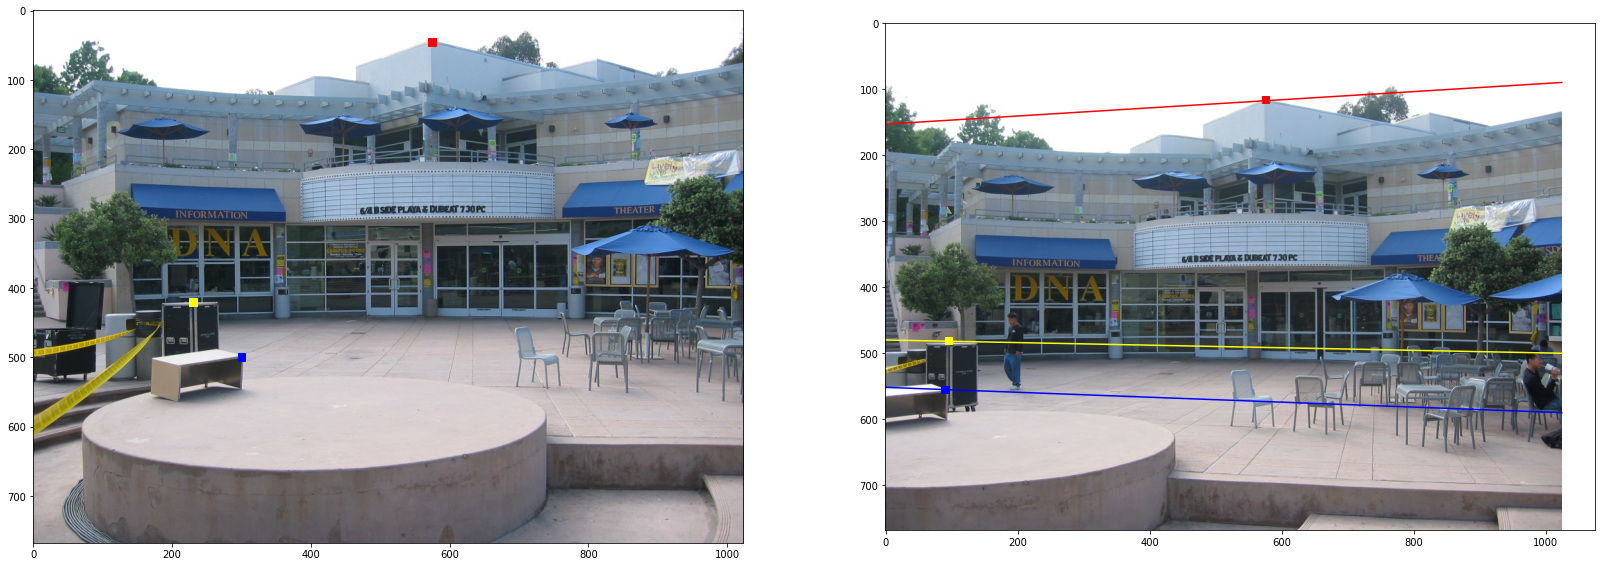

In [29]:
# Store your three points in image 1 in variable xchosen1
# Store the corresponding epipolar lines in variable epi_lines

# You can modify the code to display the figures, to highlight the corresponding point in image 2.
#    You will have to find the pixel co-ordinates of the 
#    corresponding point in image 2 manually, as we are explicitly choosing outliers(find the real matching point
#    and not the one your code outputs). The epipolar lines should
#    pass close by or through these points.
# 

"""your code here"""

xchosen1 = np.array([[575, 300, 230],
                     [45, 500, 420],
                    ])

xchosen2 = np.array([[575, 90, 95],
                     [115, 555, 480],
                    ])

epi_lines = F_LM @ homogenize(xchosen1)

# display the figures
plt.figure(figsize=(28,16))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1_rgb)
ax2.imshow(I2_rgb)
im_height, im_width = I1.shape[:2]
x_ax = np.linspace(0, im_width, im_width*10)
colors = ['red', 'blue', 'yellow']
for i in range(xchosen1.shape[1]):
    a, b, c = epi_lines[:, i]
    xx, yy = [], []
    for xval in x_ax:
        yval = -(a/b)*xval - c/b
        if yval > 0 and yval < im_width:
            xx.append(xval)
            yy.append(yval)
    x1,y1 = xchosen1[:,i]
    x2,y2 = xchosen2[:,i]
    ax1.add_patch(patches.Rectangle((x1-w/2,y1-w/2),w,w, fill=True, color=colors[i]))
    ax2.add_patch(patches.Rectangle((x2-w/2,y2-w/2),w,w, fill=True, color=colors[i]))
    ax2.plot(xx,yy, color=colors[i])
    
plt.show()

"""Comment on your results here."""

1. The epipolar lines seems to be passing through the visually approximated matching points.
2. These results are expected as the image points in one image $\boldsymbol{x}$ correspond to $\boldsymbol{x}^{'}$ in the second image, which should pass through the epipolar lines.
3. The epipolar lines are mapped using the estimated Fundamental Matrix $\boldsymbol{F}$, such that $\boldsymbol{l}_i = \boldsymbol{F}\boldsymbol{x}_i$.